# Prediction of Hypothyroidism

## 1. Defining the Question

### a) Specifying the Question


> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 
> As a Data Scientist, I have been asked to use the healthcare datasets provided to accomplish the following:  

>> * Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid


### b) Defining the Metric for Success

The project will be considered successful once we are able to build a model that will give more tha 80% accurate prediction of whether the patient has hypothyroid or not.

### c) Understanding the context 

> Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

> Nairobi Hospital would like to build a model which can assist them accurately predict whether someone has Hypothyroid or not.

### d) Recording the Experimental Design

The Dataset in this project is **hypothyroid.csv**

The design for this project will include:

* Perform your EDA
* Perform any necessary feature engineering
* Check of multicollinearity
* Decision trees
* Random Forest
* Ada boostedtrees
* Gradient boosted trees
* SVM(Support Vector Machine)
* Polynimial Kernel
* Sigmoid Kernel
* Radial Basis Function(rbf)
* Cross-validate the model
* Compute RMSE
* Coupute accuracy score


### e) Data Relevance

The relavance of our data will be answered by the following questions.

How accurate is the data at predicting the outcome of the games?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## 2. Reading the Data

In [0]:
# importing necessary libraries
# 
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for removing outliers
from scipy import stats

# importing Sklearn libraries for building models
import pydotplus
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

# library for splitting data
from sklearn.model_selection import train_test_split

# libraries for testing accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
# Loading the Dataset
# Dataset url 
hypo = pd.read_csv('hypothyroid.csv')



## 3. Checking the Data

In [121]:
# Determining the no. of records in our dataset
#
hypo.shape

(3163, 26)

In [122]:
# Previewing the top of our dataset
#
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [123]:
hypo.pregnant.unique()

array(['f', 't'], dtype=object)

In [124]:
hypo.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

In [125]:
# Checking the number of missing values in the columns
hypo.TBG.value_counts()

?       2903
28        14
23        13
25        13
21        13
31        12
20        12
30        12
19        10
29        10
33        10
27        10
26         9
36         9
32         9
16         8
17         8
18         7
38         7
34         6
39         5
110        5
35         5
37         4
108        4
40         4
22         4
14         3
43         3
24         3
53         2
65         2
15         2
41         2
13         2
9.30       1
52         1
122        1
12         1
45         1
8.50       1
8.40       1
7.30       1
3.10       1
69         1
47         1
11         1
80         1
63         1
0          1
50         1
48         1
86         1
Name: TBG, dtype: int64

In [126]:
hypo.TBG_measured.value_counts()

n    2903
y     260
Name: TBG_measured, dtype: int64

In [127]:
hypo.FTI_measured.value_counts()

y    2916
n     247
Name: FTI_measured, dtype: int64

In [128]:
hypo.TSH_measured.value_counts()

y    2695
n     468
Name: TSH_measured, dtype: int64

In [129]:
hypo.TT4_measured.value_counts()

y    2914
n     249
Name: TT4_measured, dtype: int64

In [130]:
hypo.T3_measured.value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

In [131]:
hypo.T3_measured.unique()

array(['y', 'n'], dtype=object)

In [132]:
# Previewing the bottom of our dataset
# 
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [133]:
# Checking whether each column has an appropriate datatype
#
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 4. Tidying the Dataset

In [134]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [135]:
#Replace all rows with ? to nan
hypo.replace('?',np.nan,inplace=True)
hypo['TBG'].unique()

array([nan, '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [136]:
hypo_num = ['T3','TT4','T4U','age','TSH','FTI','TBG']

# convert the columns from object to numerical
hypo[hypo_num] = hypo[hypo_num].apply(pd.to_numeric)
hypo.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [137]:
hypo.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
#Fill missing values for numerical variables
# Use the simple imputer
#Fill missing values with the mean
impute = SimpleImputer(strategy ='mean')
hypo[hypo_num] = impute.fit_transform(hypo[hypo_num])

In [139]:
# fill the null values in the sex column with the mode
hypo['sex'].fillna(hypo['sex'].mode()[0], inplace=True)
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [140]:
# Changing the categorical columns to numerical by using get_dummies
hypo_df = pd.get_dummies(hypo, columns = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured'], drop_first = True)
hypo_df.head()

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,31.283077,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,31.283077,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,31.283077,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,31.283077,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,31.283077,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [141]:
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   status                       3163 non-null   object 
 1   age                          3163 non-null   float64
 2   TSH                          3163 non-null   float64
 3   T3                           3163 non-null   float64
 4   TT4                          3163 non-null   float64
 5   T4U                          3163 non-null   float64
 6   FTI                          3163 non-null   float64
 7   TBG                          3163 non-null   float64
 8   sex_M                        3163 non-null   uint8  
 9   on_thyroxine_t               3163 non-null   uint8  
 10  query_on_thyroxine_t         3163 non-null   uint8  
 11  on_antithyroid_medication_t  3163 non-null   uint8  
 12  thyroid_surgery_t            3163 non-null   uint8  
 13  query_hypothyroid_

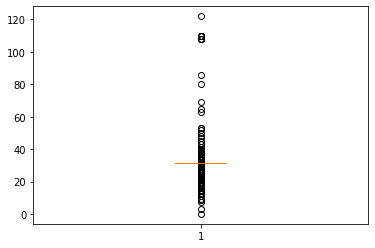

In [150]:
# Checking for Outliers
#
plt.boxplot(hypo_df['TBG'])
plt.show()

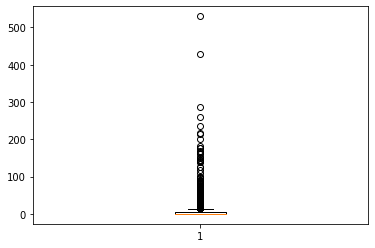

In [151]:
plt.boxplot(hypo_df['TSH'])
plt.show()

In [144]:
# More data cleaning procedures
#
hypo_df.duplicated().sum()

77

In [145]:
# dropping the duplicated data
hypo_df.drop_duplicates(inplace=True)
hypo_df.duplicated().sum()

0

## 5. Exploratory Analysis

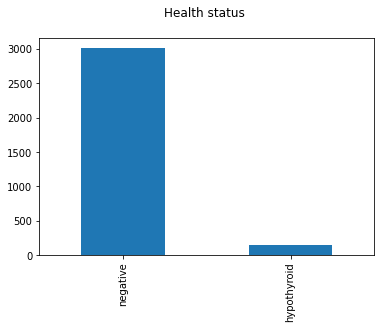

In [152]:
# Ploting the univariate summaries and recording our observations
#
hypo['status'].value_counts().plot.bar(title='Health status \n')
plt.show()

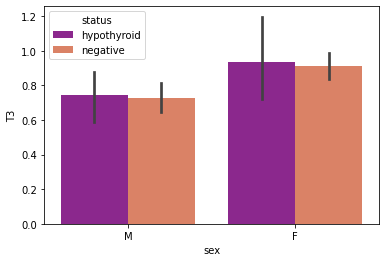

In [153]:
# change the estimator from mean to standard devaition 
sns.barplot(x ='sex', y ='T3', data = hypo, hue='status', 
            palette ='plasma', estimator = np.std)

## 6. Multicolinearity


In [0]:
# checking the correlation
independent_corr1 = hypo_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'TSH_measured_y', 'T3_measured_y', 'TT4_measured_y', 'T4U_measured_y',
       'FTI_measured_y', 'TBG_measured_y']].corr()
independent_corr1

,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
age,1.000000,-0.007727,-0.266268,-0.086443,-0.188983,0.017901,-0.043521,0.008329,0.000371,-0.019774,-0.059541,-0.012435,0.043138,-0.087046,-0.157740,0.063066,-0.063756,-0.021567,-0.036416,0.202843,0.177058,0.126845,0.124499,0.125070,-0.129311
TSH,-0.007727,1.000000,-0.169662,-0.309020,0.072491,-0.240040,-0.001411,-0.034909,-0.005383,-0.014476,-0.000991,0.012100,0.066819,-0.022663,-0.012427,-0.006306,-0.019183,-0.001465,-0.018417,-0.001820,0.003435,-0.000948,-0.000944,-0.000941,0.006038
T3,-0.266268,-0.169662,1.000000,0.534040,0.386510,0.281657,0.020400,-0.073882,0.023750,-0.014876,0.065680,-0.007033,-0.038913,0.169430,0.201870,-0.103494,0.026496,0.015167,0.083041,-0.040731,-0.002916,-0.000558,-0.000552,-0.000546,-0.000011
TT4,-0.086443,-0.309020,0.534040,1.000000,0.320417,0.677343,0.026688,-0.169250,0.217224,-0.020329,-0.002701,-0.016133,-0.010989,0.131178,0.171238,-0.042182,-0.014717,-0.002211,0.044012,-0.020154,-0.068023,-0.000895,-0.000893,-0.000891,0.004693
T4U,-0.188983,0.072491,0.386510,0.320417,1.000000,-0.294438,0.027070,-0.198213,0.071164,-0.034772,0.026518,0.026072,0.044364,0.070099,0.323330,-0.047735,0.024734,0.039037,0.069308,0.009149,-0.021588,-0.001805,-0.000789,-0.000787,0.006952
FTI,0.017901,-0.240040,0.281657,0.677343,-0.294438,1.000000,0.000905,-0.074963,0.113375,-0.004643,-0.017818,-0.026102,-0.046255,0.063246,-0.005416,-0.023485,-0.026971,-0.017183,0.001101,-0.035832,-0.048433,0.001969,0.001438,0.000422,-0.002448
TBG,-0.043521,-0.001411,0.020400,0.026688,0.027070,0.000905,1.000000,-0.037638,-0.009047,0.000422,-0.011402,-0.018992,-0.011593,0.004022,0.087437,0.003639,-0.000824,0.000080,-0.010995,0.017055,0.014037,0.009174,0.009195,0.009217,-0.010530
sex_M,0.008329,-0.034909,-0.073882,-0.169250,-0.198213,-0.074963,-0.037638,1.000000,-0.118247,0.054353,-0.019527,-0.043106,-0.062156,-0.054076,-0.090688,0.024153,-0.003712,-0.016263,-0.089744,0.033872,0.098226,0.089429,0.088826,0.090898,-0.090718
on_thyroxine_t,0.000371,-0.005383,0.023750,0.217224,0.071164,0.113375,-0.009047,-0.118247,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,0.069553,-0.161697,0.057418,0.057030,0.060094,-0.061614
query_on_thyroxine_t,-0.019774,-0.014476,-0.014876,-0.020329,-0.034772,-0.004643,0.000422,0.054353,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.109774,-0.087931,0.039118,0.039030,0.038941,-0.040082


In [0]:
# Using VIF to check for multicolinearity
pd.DataFrame(np.linalg.inv(independent_corr1.values), index = independent_corr1.index, columns=independent_corr1.columns)

,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
age,1.174805,0.023556,0.297461,-0.111568,0.103286,-0.003411,0.041891,0.045395,0.010009,-0.005444,0.039066,0.023177,-0.036902,0.025626,0.114480,-0.021323,0.060579,0.023013,-0.006427,-0.169147,-0.131844,-0.484608,0.911141,-0.351525,0.035043
TSH,0.023556,1.194408,0.095316,0.719330,-0.440141,-0.344090,-0.007577,0.047842,-0.077510,0.011820,0.005608,0.006043,-0.058230,-0.031189,0.022365,0.008979,0.031828,0.016133,0.016072,0.030557,-0.019102,-0.077180,0.194908,-0.234510,-0.107622
T3,0.297461,0.095316,1.689349,-0.500438,-0.526288,-0.284249,0.006865,-0.075382,0.100552,0.006403,-0.070377,0.008653,0.035162,-0.115580,-0.024623,0.110908,-0.023158,-0.005831,-0.071284,0.069062,-0.115079,-0.234565,0.317011,0.030351,0.165484
TT4,-0.111568,0.719330,-0.500438,4.871723,-2.497977,-3.657806,-0.060911,-0.019832,-0.461123,-0.028764,0.052060,0.052853,-0.043805,-0.197992,0.059962,-0.078723,0.040358,0.046762,0.006323,-0.083155,0.047320,0.042920,0.610382,-0.855575,-0.280149
T4U,0.103286,-0.440141,-0.526288,-2.497977,3.008275,2.619874,0.042403,0.288376,0.098454,0.041835,-0.003777,-0.044871,-0.019907,0.090017,-0.398243,0.025615,-0.027992,-0.062782,-0.009177,-0.017784,0.048455,0.239583,-0.707856,0.385750,-0.027996
FTI,-0.003411,-0.344090,-0.284249,-3.657806,2.619874,4.245430,0.048741,0.204904,0.169709,0.042722,0.012579,-0.015498,0.060660,0.108937,-0.139889,0.047965,0.004492,-0.030925,0.023742,0.111833,0.032949,-0.078292,-0.780747,0.934187,0.202785
TBG,0.041891,-0.007577,0.006865,-0.060911,0.042403,0.048741,1.012602,0.040008,0.019276,-0.006050,0.014522,0.020676,0.012496,0.003405,-0.084302,-0.002973,0.004971,0.000350,0.021497,-0.025959,-0.003787,-0.009871,0.062257,-0.028047,0.021776
sex_M,0.045395,0.047842,-0.075382,-0.019832,0.288376,0.204904,0.040008,1.112997,0.087704,-0.040256,0.021418,0.044065,0.054189,0.043173,0.023615,0.001269,0.028234,0.013229,0.082016,0.078981,-0.072734,-0.223267,0.732029,-0.590884,0.034299
on_thyroxine_t,0.010009,-0.077510,0.100552,-0.461123,0.098454,0.169709,0.019276,0.087704,1.184111,0.023621,0.006864,-0.029365,-0.033691,0.104965,0.013864,0.063029,0.028331,0.011379,0.034244,-0.219781,0.365800,-0.212429,0.985102,-0.782979,0.106745
query_on_thyroxine_t,-0.005444,0.011820,0.006403,-0.028764,0.041835,0.042722,-0.006050,-0.040256,0.023621,1.054117,0.006138,-0.028731,0.017374,0.048241,0.000200,0.022090,-0.039543,-0.000321,-0.011306,0.247464,0.086103,-0.252657,-0.116639,0.287263,0.176634


In [0]:
# the last 4 columns have a very high VIF so we will drop them and see the impact
independent_corr2 = hypo_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'TSH_measured_y', 'T3_measured_y']].corr()
independent_corr2

,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y
age,1.000000,-0.007727,-0.266268,-0.086443,-0.188983,0.017901,-0.043521,0.008329,0.000371,-0.019774,-0.059541,-0.012435,0.043138,-0.087046,-0.157740,0.063066,-0.063756,-0.021567,-0.036416,0.202843,0.177058
TSH,-0.007727,1.000000,-0.169662,-0.309020,0.072491,-0.240040,-0.001411,-0.034909,-0.005383,-0.014476,-0.000991,0.012100,0.066819,-0.022663,-0.012427,-0.006306,-0.019183,-0.001465,-0.018417,-0.001820,0.003435
T3,-0.266268,-0.169662,1.000000,0.534040,0.386510,0.281657,0.020400,-0.073882,0.023750,-0.014876,0.065680,-0.007033,-0.038913,0.169430,0.201870,-0.103494,0.026496,0.015167,0.083041,-0.040731,-0.002916
TT4,-0.086443,-0.309020,0.534040,1.000000,0.320417,0.677343,0.026688,-0.169250,0.217224,-0.020329,-0.002701,-0.016133,-0.010989,0.131178,0.171238,-0.042182,-0.014717,-0.002211,0.044012,-0.020154,-0.068023
T4U,-0.188983,0.072491,0.386510,0.320417,1.000000,-0.294438,0.027070,-0.198213,0.071164,-0.034772,0.026518,0.026072,0.044364,0.070099,0.323330,-0.047735,0.024734,0.039037,0.069308,0.009149,-0.021588
FTI,0.017901,-0.240040,0.281657,0.677343,-0.294438,1.000000,0.000905,-0.074963,0.113375,-0.004643,-0.017818,-0.026102,-0.046255,0.063246,-0.005416,-0.023485,-0.026971,-0.017183,0.001101,-0.035832,-0.048433
TBG,-0.043521,-0.001411,0.020400,0.026688,0.027070,0.000905,1.000000,-0.037638,-0.009047,0.000422,-0.011402,-0.018992,-0.011593,0.004022,0.087437,0.003639,-0.000824,0.000080,-0.010995,0.017055,0.014037
sex_M,0.008329,-0.034909,-0.073882,-0.169250,-0.198213,-0.074963,-0.037638,1.000000,-0.118247,0.054353,-0.019527,-0.043106,-0.062156,-0.054076,-0.090688,0.024153,-0.003712,-0.016263,-0.089744,0.033872,0.098226
on_thyroxine_t,0.000371,-0.005383,0.023750,0.217224,0.071164,0.113375,-0.009047,-0.118247,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,0.069553,-0.161697
query_on_thyroxine_t,-0.019774,-0.014476,-0.014876,-0.020329,-0.034772,-0.004643,0.000422,0.054353,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.109774,-0.087931


In [0]:
# Using VIF to check for multicolinearity after dropping the last 4 columns
pd.DataFrame(np.linalg.inv(independent_corr2.values), index = independent_corr2.index, columns=independent_corr2.columns)

,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y
age,1.171981,0.023716,0.297318,-0.113310,0.105894,-0.000098,0.041650,0.046285,0.010232,-0.000590,0.037630,0.022164,-0.036528,0.025729,0.113290,-0.021658,0.057219,0.022831,-0.008024,-0.145578,-0.124566
TSH,0.023716,1.193556,0.095831,0.717820,-0.440427,-0.343375,-0.007449,0.046773,-0.078262,0.010988,0.006321,0.006498,-0.057942,-0.032447,0.022962,0.009181,0.030323,0.016132,0.016221,0.025863,-0.020780
T3,0.297318,0.095831,1.686835,-0.497110,-0.526672,-0.287869,0.006714,-0.078322,0.096926,0.000075,-0.069787,0.009034,0.033590,-0.114173,-0.024979,0.110698,-0.026283,-0.005825,-0.069528,0.037363,-0.124988
TT4,-0.113310,0.717820,-0.497110,4.864244,-2.495669,-3.649516,-0.060829,-0.017729,-0.458745,-0.018740,0.051213,0.052210,-0.041381,-0.200724,0.060225,-0.078543,0.036535,0.046591,0.003483,-0.034824,0.061841
T4U,0.105894,-0.440427,-0.526672,-2.495669,3.005535,2.615633,0.042657,0.286651,0.097448,0.035178,-0.002059,-0.043673,-0.020604,0.089738,-0.397056,0.025960,-0.024819,-0.062600,-0.007240,-0.050284,0.038435
FTI,-0.000098,-0.343375,-0.287869,-3.649516,2.615633,4.234424,0.048897,0.200401,0.165554,0.026827,0.015135,-0.013702,0.057759,0.110641,-0.139043,0.048123,0.008787,-0.030648,0.028137,0.034263,0.009241
TBG,0.041650,-0.007449,0.006714,-0.060829,0.042657,0.048897,1.012557,0.040052,0.019168,-0.005737,0.014347,0.020554,0.012445,0.003639,-0.084473,-0.003035,0.004469,0.000333,0.021426,-0.024459,-0.003329
sex_M,0.046285,0.046773,-0.078322,-0.017729,0.286651,0.200401,0.040052,1.105185,0.079330,-0.053420,0.024333,0.045936,0.052181,0.042948,0.024677,0.001415,0.018322,0.013265,0.085747,0.011535,-0.094469
on_thyroxine_t,0.010232,-0.078262,0.096926,-0.458745,0.097448,0.165554,0.019168,0.079330,1.174576,0.010528,0.009455,-0.027736,-0.035997,0.105522,0.014481,0.062982,0.015459,0.011363,0.038065,-0.287353,0.343885
query_on_thyroxine_t,-0.000590,0.010988,0.000075,-0.018740,0.035178,0.026827,-0.005737,-0.053420,0.010528,1.023438,0.012303,-0.024601,0.012499,0.049059,0.002661,0.022565,-0.045400,0.000028,-0.002724,0.094198,0.037984


## 7. Implementing the Solution

### Decision Trees Model

In [0]:
# we will using the features that have a VIF of below 5 to train the models

test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'TSH_measured_y', 'T3_measured_y']
       
X = hypo_df[test_features].values
y = hypo_df['status']

# splitting the data into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [0]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# 98% accuracy is a good start

Accuracy: 0.988673139158576


Let's find out the most important features

In [0]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('TSH', 0.27), ('T3', 0.03), ('TT4', 0.0), ('T4U', 0.03), ('FTI', 0.62), ('TBG', 0.0), ('sex_M', 0.0), ('on_thyroxine_t', 0.01), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_t', 0.02), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_t', 0.01), ('query_hyperthyroid_t', 0.0), ('pregnant_t', 0.0), ('sick_t', 0.0), ('tumor_t', 0.0), ('lithium_t', 0.0), ('goitre_t', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_y', 0.0)]

Variable: FTI                  Importance: 0.62
Variable: TSH                  Importance: 0.27
Variable: T3                   Importance: 0.03
Variable: T4U                  Importance: 0.03
Variable: age                  Importance: 0.02
Variable: on_antithyroid_medication_t Importance: 0.02
Variable: on_thyroxine_t       Importance: 0.01
Variable: query_hypothyroid_t  Importance: 0.01
Variable: TT4                  Importance: 0.0
Variable: TBG                  Importance: 0.0
Variable: sex_M                Importance: 0.0
Variable: query_on

In [0]:
# Decision trees model with the important features only
new_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'on_thyroxine_t',
                 'on_antithyroid_medication_t', 'query_hypothyroid_t']
       
X_new = hypo_df[new_features].values
y_new = hypo_df['status']

# splitting the data into 80% training data and 20% testing data
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)



In [0]:
# Train it on our training set.
tree = tree.fit(X_new_train, y_new_train)

# Predict based on the model we've trained
y_new_pred = tree.predict(X_new_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_new_test, y_new_pred))

# apparentely the accuracy has reduced by a few points

Accuracy: 0.9854368932038835


#### Random Forest

In [0]:
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_new_train, y_new_train)

# Predict based on the model we've trained
forest_pred = forest.predict(X_new_test)

# checking the accuracy
print("Accuracy:",metrics.accuracy_score(y_new_test, forest_pred))

Accuracy: 0.9902912621359223


#### AdaBoost 

In [0]:

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=0)

ada_boost = ada_boost.fit(X_new_train, y_new_train)
ada_pred = ada_boost.predict(X_new_test)

# checking the accuracy
print("Accuracy:",metrics.accuracy_score(y_new_test, ada_pred))

Accuracy: 0.9935275080906149


#### Gradient Boost

In [0]:
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.7, max_depth=4)
gbc = gbc.fit(X_new_train, y_new_train)

gbc_pred = gbc.predict(X_new_test)

# checking the accuracy
print("Accuracy:",metrics.accuracy_score(y_new_test, gbc_pred))

Accuracy: 0.9838187702265372


### Support Vector Machine

In [0]:
X =  hypo_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'on_thyroxine_t',
                 'on_antithyroid_medication_t', 'query_hypothyroid_t']] # We remove all the unnecessary columns. 
y = np.where(hypo_df['status']=='hypothyroid',0,1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

(618,)

#### Linear Kernel

In [0]:
# Let's now build the svm model 
linearSVM_model = SVC(kernel = 'linear')
# Train the model using the training set
linearSVM_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = linearSVM_model.predict(X_test)
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9854368932038835

#### Radial basis function (rbf)

In [0]:
data = hypo_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'on_thyroxine_t',
        'on_antithyroid_medication_t', 'query_hypothyroid_t']]

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(data)
X = pca.transform(data)
print(X.shape)


#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

(3086, 2)


In [0]:
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
rbf_pred = rbfclassifier.predict(X_test)

# Checking the accurancy of the model
rbf_accuracy = accuracy_score(y_test,rbf_pred)
rbf_accuracy

0.9854368932038835

#### Sigmoid Function

In [0]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
sig_pred = sigclassifier.predict(X_test)

# Checking the accurancy of the model
sig_accuracy = accuracy_score(y_test,sig_pred)
sig_accuracy

0.959546925566343

**Comparison of the Kernel Performance**

When we compare the performance of the three kernel, it clear that sigmoid performs the worst. This is because the sigmoid function returns two values, 0 and 1 hence its more suited to binary classification problems.

On the other hand, we can see that the linear & rbf kernel also know as Gaussian Kernel achieved a 98.5% prediction rate. 

The Polynomial function takes too long to run so I opted to remove it from the project.

## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we do

### b). Do we need other data to answer our question?

It would have been better if all the columns were filled with the correct data. That would mean that we won't have to doctor some data so as to have sufficient data to process. This would also increase the accuracy and effectiveness of the model.

### c). Did we have the right question?

Yes we do